In [1]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors
import numpy as np
import math

In [2]:
#importing data
data = pd.read_csv("HW4.csv")
data.head()

,a,b,label
0,7.308150,3.378029,1
1,-16.243747,-16.011393,0
2,7.584490,2.642162,1
3,-15.965623,-12.119112,0
4,-18.601721,15.422406,1


In [3]:
#Taking feature values and Classification values as x and y
x,y = data.iloc[:,:-1].values,data.iloc[:,-1].values
y = np.array(y).reshape(-1,1)

In [4]:
#Number of neurons per layer without the bias
neurons_per_layer = [2,2,1]

In [10]:
#Initializing the parameters W and b for each layer
def init_parameters(neurons_per_layer):
  np.random.seed(2021)
  num_layer = len(neurons_per_layer)
  param = {}
  for i in range(1, num_layer):
    param["W" + str(i)] = np.random.randn(neurons_per_layer[i], neurons_per_layer[i - 1]) * 0.01
    param["b" + str(i)] = np.ones((neurons_per_layer[i], 1))
  return param

In [11]:
#Parameters W and b Initialized
parameters = init_parameters(neurons_per_layer)
parameters

{'W1': array([[ 0.01488609,  0.00676011],
        [-0.00418451, -0.00806521]]),
 'b1': array([[1.],
        [1.]]),
 'W2': array([[ 0.00555876, -0.00705504]]),
 'b2': array([[1.]])}

In [12]:
#Activation Functions

#Sigmoid
def sigmoid_fn(z):
  a = 1 / (1 + np.exp(-z))
  return a, z

#Tan_h
def tanh_fn(z):
  a = np.tanh(z)
  return a, z
  
#Relu
def relu_fn(z):
  a = np.maximum(0, z)
  return a, z

In [13]:
#Log loss Function
def logloss(y,y_pred):
  loss = -np.mean(np.dot(y,np.log(y_pred)) + np.dot(1-y,np.log(1-y_pred)))
  return loss

In [14]:
#Forward Propogation
#Activation Function Value
def activation_fun(W,b,a_prev,active_fn):
  if active_fn == "sigmoid_fn":
    z, lin_mem = forward_prop(W,b,a_prev)
    a, act_mem = sigmoid_fn(z)
  elif active_fn == "relu_fn":
    z, lin_mem = forward_prop(W,b,a_prev)
    a, act_mem = relu_fn(z)
  elif active_fn == "tanh_fn":
    z, lin_mem = forward_prop(W,b,a_prev)
    a, act_mem = tanh_fn(z)
  memory = (lin_mem, act_mem)
  return a, memory
def forward_prop(W,b,a_prev):
  z = np.dot(W,a_prev) + b #Calculating Z = WX + b
  memory = (a_prev, W, b)  #Storing
  return z, memory

In [19]:
#Returning final output and Stored Parameters
def for_model(X, param, active_func="relu_fn"):
  a = X.T
  memories = [] #To store parameters during Forward Prop
  L = len(param) // 2
  for i in range(1, L):
    a_prev = a
    a, memory = activation_fun(param["W" + str(i)], param["b" + str(i)],a_prev,active_fn=active_func)
    memories.append(memory)
  y_pred, memory = activation_fun(param["W" + str(L)], param["b" + str(L)],a,active_fn="sigmoid_fn")
  memories.append(memory)
  return y_pred, memories

In [20]:
y_pred, memory = for_model(x, parameters, active_func="relu_fn")

In [21]:
#Cost of 1 Forward Propogation
cost_forward = logloss(y,y_pred)
cost_forward

0.81286482304987

In [22]:
#Final Output
print(y_pred)

[[0.73098845 0.73010735 0.73098088 ... 0.73103767 0.73101252 0.73100544]]


In [23]:
#Backward Propogation
def helper2(dz, lin_mem,active_fn = "sigmoid_fn"):
  a_prev, W, b = lin_mem
  dW = np.dot(dz, a_prev.T)
  db = np.sum(dz, axis=1, keepdims=True)
  da_prev = np.dot(W.T,dz)
  return da_prev, dW, db

In [24]:
#Differentiation of Activation Functions
def sigmoid_diff(da, z):
  a, z = sigmoid_fn(z)
  dz = da * a * (1 - a)
  return dz
def tanh_diff(da, z):
  a, z = tanh_fn(z)
  dz = da * (1 - np.square(a))
  return dz
def relu_diff(da, z):
  dz = np.where(da <= 0, 0, 1)
  return dz
def helper1(da, memory, active_fn):
  lin_mem, act_mem = memory
  if active_fn == "relu_fn":
    dz = relu_diff(da, act_mem)
    da_prev, dW, db = helper2(dz, lin_mem,active_fn)
  elif active_fn == "sigmoid_fn":
    dz = sigmoid_diff(da, act_mem)
    da_prev, dW, db = helper2(dz, lin_mem,active_fn)
  elif active_fn == "tanh_fn":
    dz = tanh_diff(da, act_mem)
    da_prev, dW, db = helper2(dz, lin_mem,active_fn)
  return da_prev, dW, db

In [30]:
#Main for Back Propogation
def back_prop(y,y_pred,memory,active_func="relu_fn"):
  gradient = {} #To store gradients after Back prop
  y_new = y.T
  lenght = len(memory)
  #dloss
  dy_pred = -1 * np.divide((y_new),(y_pred)) + np.divide(1-(y_new),1-(y_pred))
  #Calculating Gradient for Output layer
  gradient["da" + str(lenght-1)], gradient["dW" + str(lenght)], gradient["db" + str(lenght)] = helper1(dy_pred, memory[lenght - 1],active_fn="sigmoid_fn")
  #Calculating Gradient for hidden layer
  for i in range(lenght-1,0,-1):
    gradient["da" + str(i - 1)], gradient["dW" + str(i)], gradient["db" + str(i)] = helper1(gradient["da" + str(i)], memory[i - 1],active_fn="relu_fn")
  gradient["da" + str(lenght-1)] = dy_pred
  return gradient

In [31]:
#Gradients and Activation of all the layers after back propogation
result = back_prop(y,y_pred,memory,active_func="relu_fn")
result

{'da1': array([[-1.36801067,  3.70517688, -1.36802484, ..., -1.36791856,
          3.71764517, -1.36797888]]),
 'dW2': array([[ 924.97007311, 1232.0893135 ]]),
 'db2': array([[1153.60055739]]),
 'da0': array([[-0.00418451,  0.01488609, -0.00418451, ..., -0.00418451,
          0.01488609, -0.00418451],
        [-0.00806521,  0.00676011, -0.00806521, ..., -0.00806521,
          0.00676011, -0.00806521]]),
 'dW1': array([[-23484.54635964,   5373.18662014],
        [-10533.46609323,  23204.88326723]]),
 'db1': array([[2500],
        [2500]])}

In [32]:
#Splitting data into Train,Test and Validation (0.6,0.2,0.2)
from sklearn.model_selection import train_test_split
X_train, X_rem, Y_train, Y_rem = train_test_split(x,y, train_size=0.6)
X_valid, X_test, Y_valid, Y_test = train_test_split(X_rem,Y_rem, test_size=0.5)

In [34]:
#Running epoch with mini batch
def final_call(neurons_per_layer,lamb):
  epoch = 3000
  L = len(neurons_per_layer)
  alpha = 0.01 #Learning rate
  number = x.shape[0]
  batch_size = 500
  num_batch = int(number / batch_size)
  #initialization parameters
  parameters = init_parameters(neurons_per_layer)
  for i in range(1,epoch+1):
    m=0
    for z in range(num_batch):
        #initialization of gradients for each batch
        deltaw1 = 0
        deltab1 = 0
        deltaw2 = 0
        deltab2 = 0
        index = np.random.randint(low=0,high=5000,size=500)
        x_mini = x[m:m+batch_size]
        y_mini = y[m:m+batch_size]
        m = m + batch_size

        #Forward Prop
        y_pred, memory = for_model(x_mini, parameters, active_func="relu_fn")
        #Backward Prop
        backward = back_prop(y_mini,y_pred,memory,active_func="relu_fn")
        #Summing Gradients for each batch
        deltaw1 = deltaw1 + backward["dW1"]
        deltab1 = deltab1 + backward["db1"]
        deltaw2 =  deltaw2 + backward["dW2"]
        deltab2 = deltab2 + backward["db2"]
      #Updating Parameters after each mini batch
    parameters["W1"] = parameters["W1"] - alpha * ((1 / number) * deltaw1 + (lamb)*parameters["W1"])
    parameters["W2"] = parameters["W2"] - alpha * ((1 / number) * deltaw2 + (lamb)*parameters["W2"])
    parameters["b1"] = parameters["b1"] - alpha * (1 / number) * deltab1
    parameters["b2"] = parameters["b2"] - alpha * (1 / number) * deltab2
  return parameters

In [35]:
print(parameters,'\n')
print(y_pred)

{'W1': array([[ 0.01488609,  0.00676011],
       [-0.00418451, -0.00806521]]), 'b1': array([[1.],
       [1.]]), 'W2': array([[ 0.00555876, -0.00705504]]), 'b2': array([[1.]])} 

[[0.73098845 0.73010735 0.73098088 ... 0.73103767 0.73101252 0.73100544]]


In [36]:
#Neural Network with 3 Layers and S2 = 2
neurons_per_layer = [2,2,1]

In [37]:
#Checking model for various lambdas
lamb = [0.01,10,0.5,7,20,5]
for l in lamb:
  parameters = final_call(neurons_per_layer,l)
  y_pred_valid, memory = for_model(X_valid, parameters, active_func="sigmoid_fn")
  cost_valid = logloss(Y_valid,y_pred_valid)
  print("Loss for lambda ->",l," is ",cost_valid)

Loss for lambda -> 0.01  is  0.7530753080867173
Loss for lambda -> 10  is  0.7268174123015888
Loss for lambda -> 0.5  is  0.7320513356799543
Loss for lambda -> 7  is  0.7268350474333494
Loss for lambda -> 20  is  0.7268034979571145
Loss for lambda -> 5  is  0.7268208965394726


In [38]:
#Calculating Logloss for test split data
param_test = final_call(neurons_per_layer,20)
y_pred_test, memory = for_model(X_test, param_test, active_func="sigmoid_fn")
cost_test = logloss(Y_test,y_pred_test)
print("Logloss for test set ", cost_test)

Logloss for test set  0.7220152682503943


In [39]:
#Calculating Logloss for test train data
param_train = final_call(neurons_per_layer,20)
y_pred_train, memory = for_model(X_train, param_train, active_func="sigmoid_fn")
cost_train = logloss(Y_train,y_pred_train)
print("Logloss for training set ",cost_train)

Logloss for training set  0.7196211533970358


In [40]:
#Neural Network with 3 Layers and S2 = 10
neurons_per_layer = [2,10,1]

In [41]:
#Checking model for various lambdas
lamb = [0.1,10,0.5,7,20,5]
for l in lamb:
  param = final_call(neurons_per_layer,l)
  y_pred_valid, memory = for_model(X_valid, param, active_func="sigmoid_fn")
  cost_valid = logloss(Y_valid,y_pred_valid)
  print("Loss for lambda ->",l," is ",cost_valid)

Loss for lambda -> 0.1  is  0.7541429897639004
Loss for lambda -> 10  is  0.726922058008265
Loss for lambda -> 0.5  is  0.7399815888490343
Loss for lambda -> 7  is  0.7270058398765828
Loss for lambda -> 20  is  0.726855873399464
Loss for lambda -> 5  is  0.7269671534685541


In [42]:
#Calculating Logloss for test split data
param_test = final_call(neurons_per_layer,20)
y_pred_test, memory = for_model(X_test, param_test, active_func="sigmoid_fn")
cost_test = logloss(Y_test,y_pred_test)
print("Logloss for test set ", cost_test)

Logloss for test set  0.7220635683545326


In [43]:
#Calculating Logloss for test split data
param_train = final_call(neurons_per_layer,20)
y_pred_train, memory = for_model(X_train, param_train, active_func="sigmoid_fn")
cost_train = logloss(Y_train,y_pred_train)
print("Logloss for training set ",cost_train)

Logloss for training set  0.719667415832066


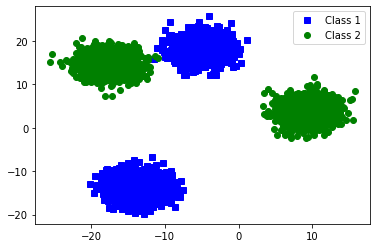

In [44]:
#Plotting Scatter plot for the two classes
data1 = np.array(data)
data1[:, 1]
plt.plot(data1[:, 0][data1[:,-1]==0] , data1[:, 1][data1[:,-1]==0] , "s" , color = "blue", label="Class 1")
plt.plot(data1[:, 0][data1[:,-1]==1] , data1[:, 1][data1[:,-1]==1] , "o", color = "green", label="Class 2")
plt.legend()